# 追い越しを認めるように変更

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from ds2s_OV_revised import ds2s_OV_revised

In [2]:
def plot_pattern(model, ni, nf, colored=5):
    x = np.array([[j for i in range(model.K)] for j in range(ni, nf+1)]) \
        .flatten()
    y = model.x[ni:nf+1, :model.K].flatten()
    plt.figure(figsize=(6.4, 6.4))
    plt.title(
        "L={}, K={}, n0={}, x0={}, v0={}, dt={}, dx={}"
            .format(model.L, model.K, model.n_0, model.x_0, model.v_0, model.dt, model.dx)
    )
    plt.xlabel("Time")
    plt.ylabel("Location of Vehicles")
    plt.scatter(x, y, s=1)
    for i in range(0, model.K, colored):
        x = np.array([j for j in range(ni, nf+1)])
        y = model.x[ni:nf+1, i]
        plt.scatter(x, y, s=1, c="red")
    plt.show()

In [3]:
def plot_flow(model, ni, nf):
	x = np.array([i for i in range(nf - ni + 1)])
	y = np.array([model.flow(0, i) for i in range(ni, nf + 1)])
	plt.figure(figsize=(6.4, 6.4))
	plt.title(
		"L={}, K={}, n0={}, x0={}, v0={}, dt={}, dx={}"
			.format(model.L, model.K, model.n_0, model.x_0, model.v_0, model.dt, model.dx)
	)
	plt.xlabel("Time")
	plt.ylabel("Flow")
	plt.plot(x, y)
	plt.show()

In [4]:
def plot_fundamental(density, flow):
	plt.figure(figsize=(10, 10))
	# plt.xlim((0, 1.0))
	# plt.ylim((0, 1.0))
	plt.scatter(density, flow, s=3)
	plt.show()

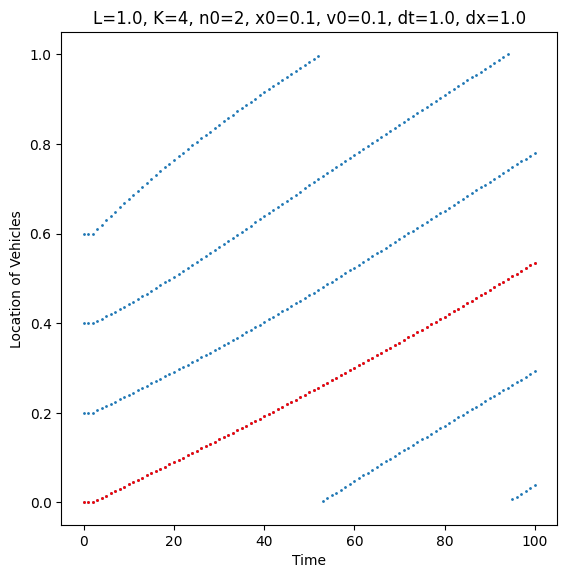

In [5]:
model = ds2s_OV_revised(
	L=1.0,
	K=4,
	n_0=2,
	x_0=0.1,
	v_0=0.1,
	dt=1.0,
	dx=1.0,
	x_init=np.array([0.0, 0.2, 0.4, 0.6]),
	n_max=1000,
)
model.simulate()
plot_pattern(model, 0, 100)

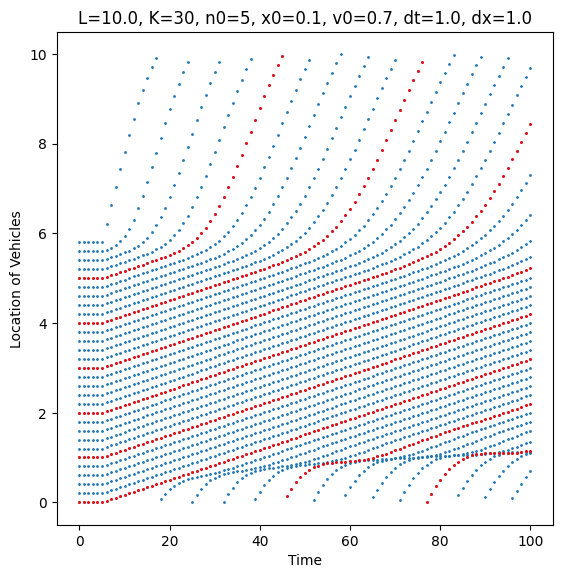

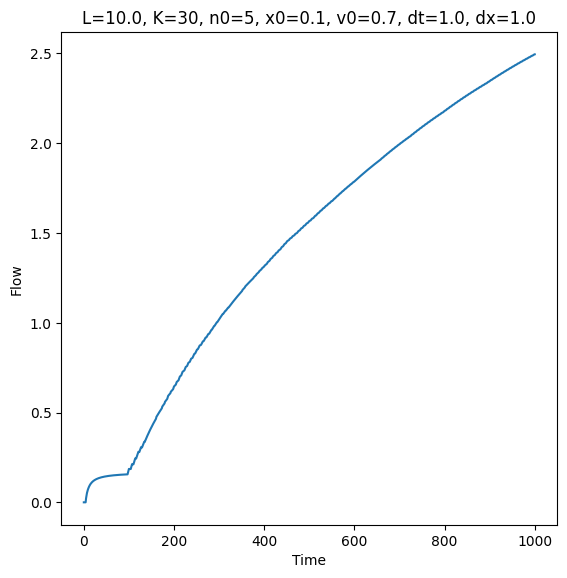

In [6]:
model = ds2s_OV_revised(
	L=10.0,
	K=30,
	n_0=5,
	x_0=0.1,
	v_0=0.7,
	dt=1.0,
	dx=1.0,
	x_init=np.array([(2.0 * i) / 10 for i in range(30)]),
	n_max=1200,
)
model.simulate()
plot_pattern(model, 0, 100)
plot_flow(model=model, ni=0, nf=1000)

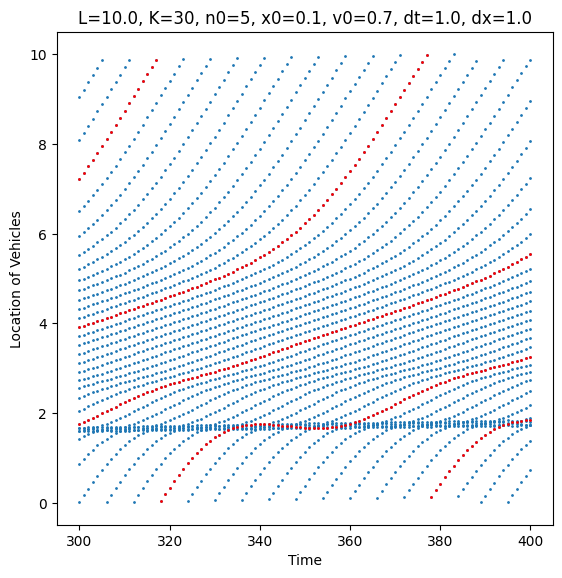

In [26]:
plot_pattern(model, 300, 400, colored=10)

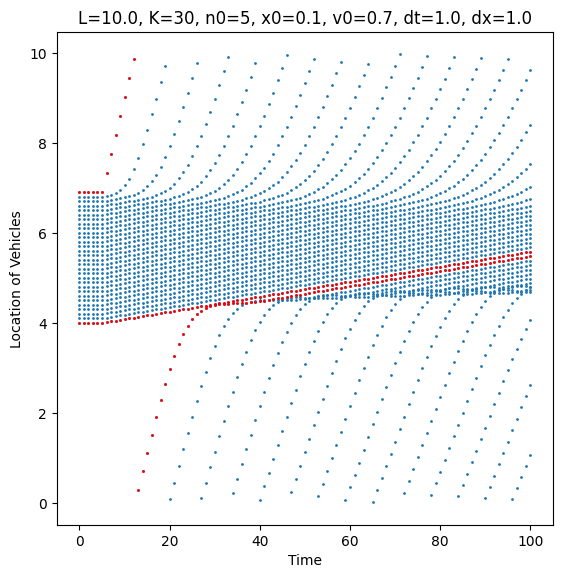

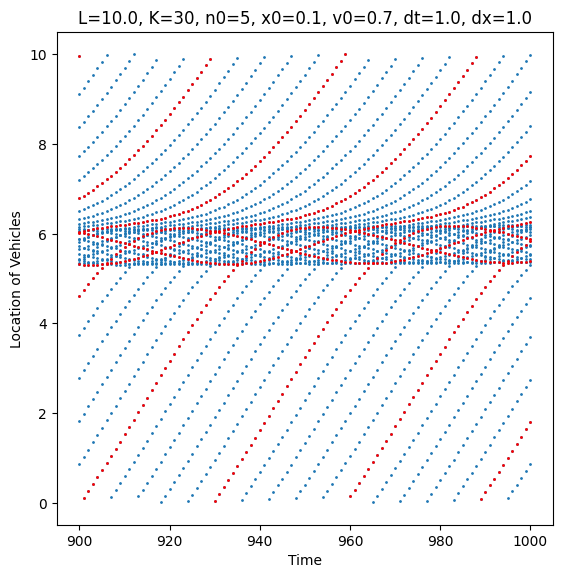

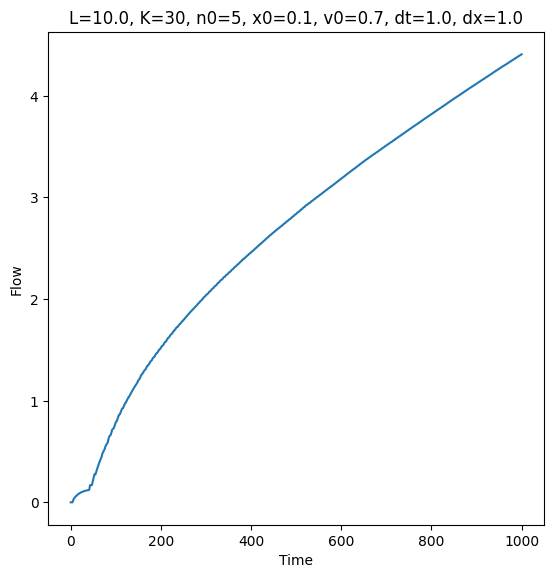

In [27]:
model = ds2s_OV_revised(
	L=10.0,
	K=30,
	n_0=5,
	x_0=0.1,
	v_0=0.7,
	dt=1.0,
	dx=1.0,
	x_init=np.array([4.0 + 0.1 * i for i in range(30)]),
	n_max=10000,
)
model.simulate()
plot_pattern(model, 0, 100, colored=29)
plot_pattern(model, 900, 1000)
plot_flow(model=model, ni=0, nf=1000)

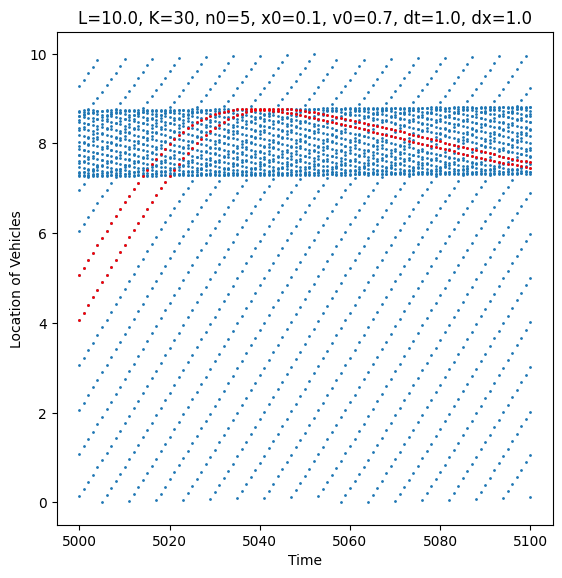

In [28]:
plot_pattern(model, 5000, 5100, colored=29)

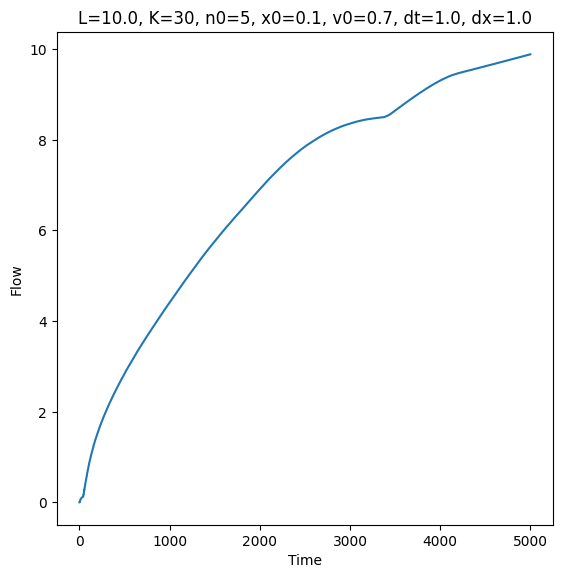

In [29]:
plot_flow(model=model, ni=0, nf=5000)

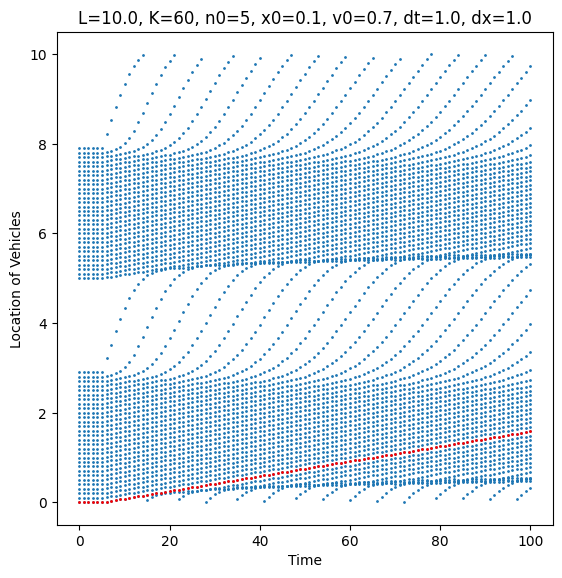

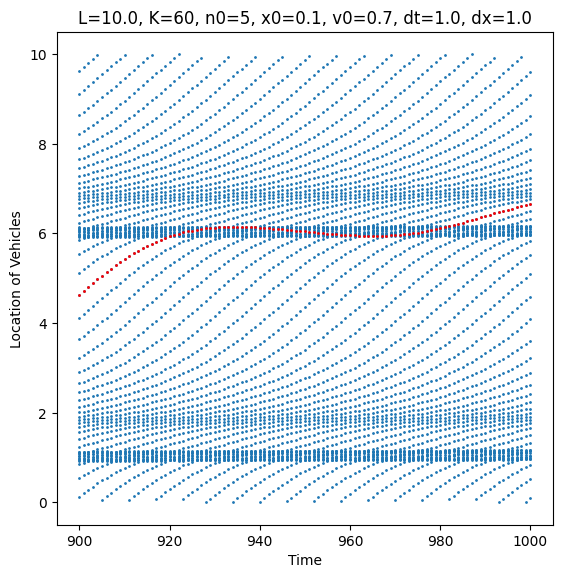

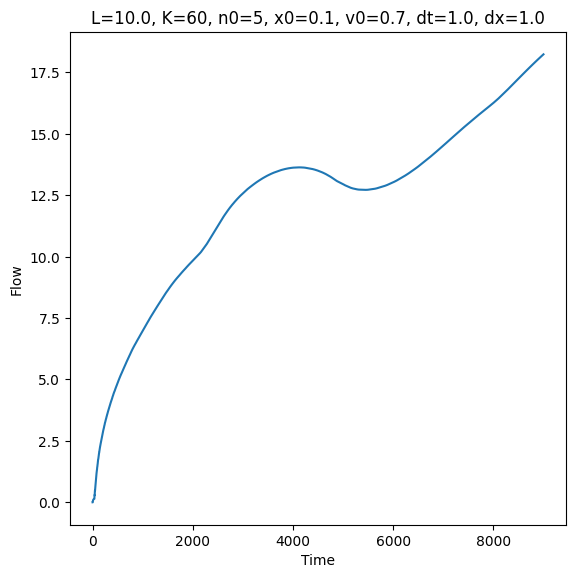

In [12]:
model = ds2s_OV_revised(
	L=10.0,
	K=60,
	n_0=5,
	x_0=0.1,
	v_0=0.7,
	dt=1.0,
	dx=1.0,
	x_init=np.array(
		[0.1 * i for i in range(30)]
		+ [5.0 + 0.1 * i for i in range(30)]
	),
	n_max=10000,
)
model.simulate()
plot_pattern(model, 0, 100)
plot_pattern(model, 900, 1000)
plot_flow(model=model, ni=0, nf=9000)

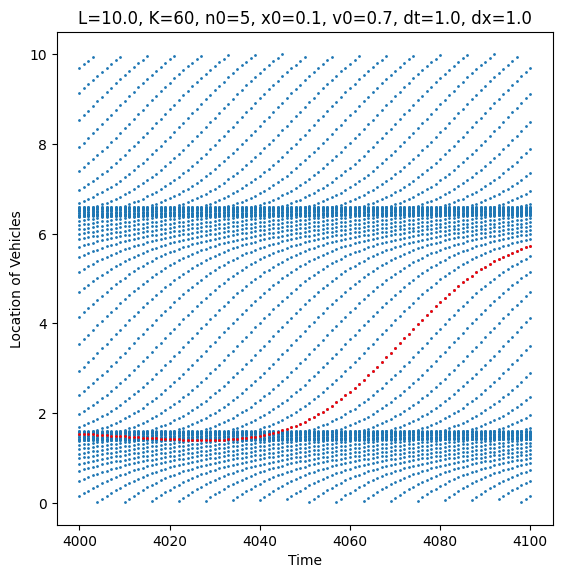

In [13]:
plot_pattern(model, 4000, 4100)

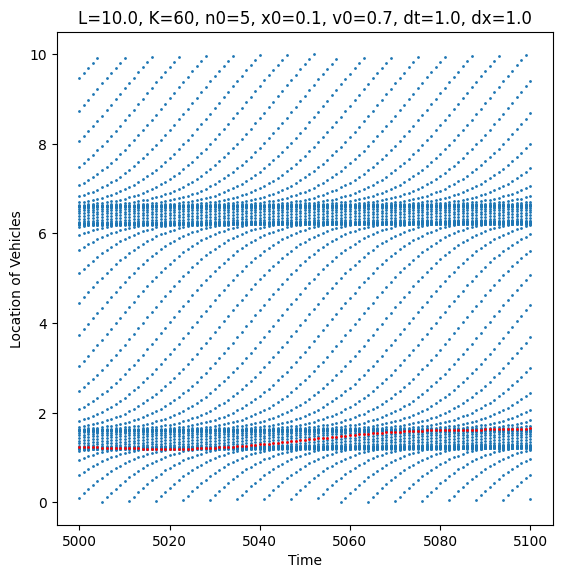

In [14]:
plot_pattern(model, 5000, 5100)

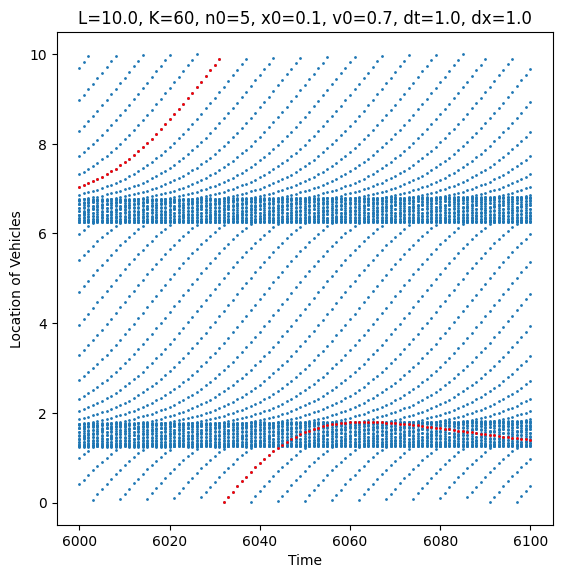

In [15]:
plot_pattern(model, 6000, 6100)

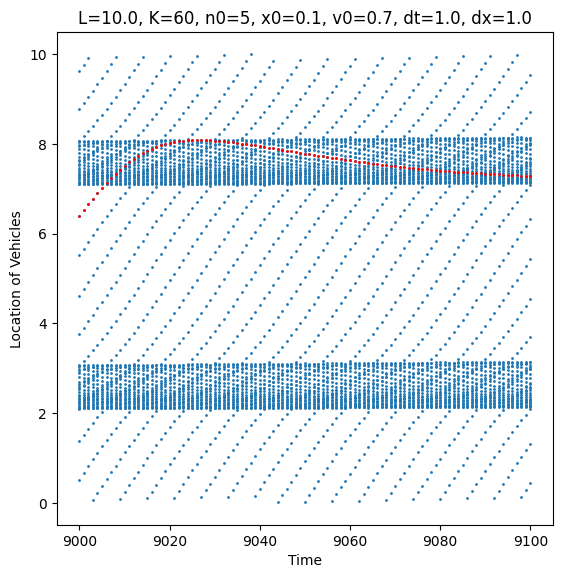

In [16]:
plot_pattern(model, 9000, 9100, colored=8)

In [ ]:
# ランダム
density = []
flow = []
for K in range(1, 101):
	x_init = np.array(sorted(random.sample([0.1 * i for i in range(100)], K)))
	model = ds2s_OV_revised(
		L=10.0,
		K=K,
		n_0=5,
		x_0=0.1,
		v_0=0.7,
		dt=1.0,
		dx=1.0,
		x_init=x_init,
		n_max=10010,
	)
	model.simulate()
	density.append(model.density())
	flow.append(model.flow(9900, 10000))
	plot_pattern(model, 9900, 10000, colored=20)

In [8]:
L = 10.0
n_0 = 5
x_0 = 0.1
v_0 = 0.7
dt = 1.0
dx = 1.0

K =  100, (   0/ 100)

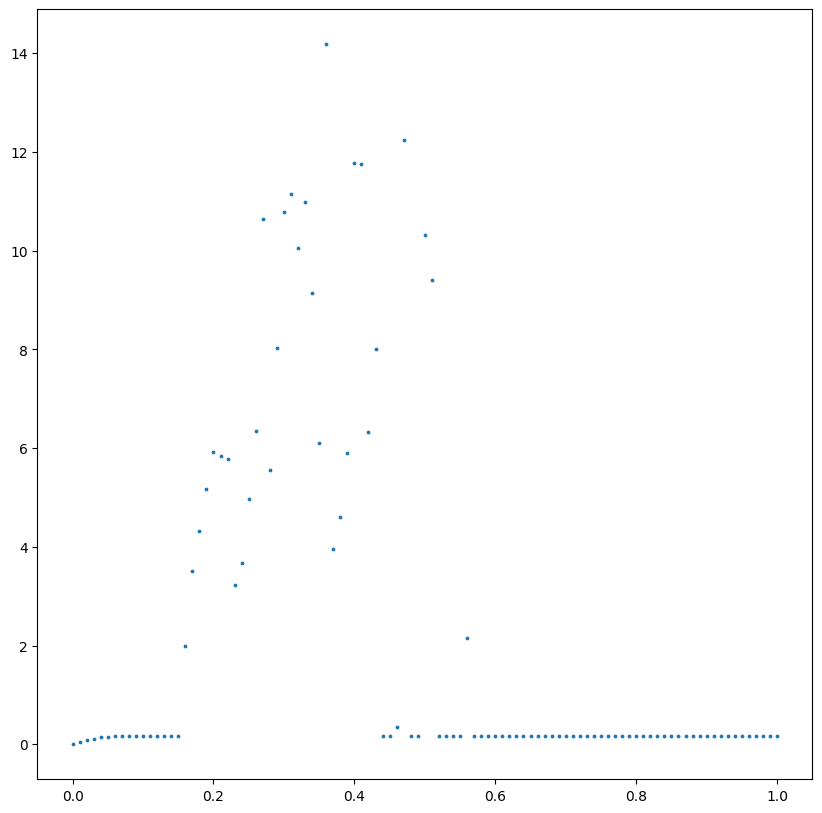

In [9]:
import sys

density = []
flow = []
for K in range(101):
	for _ in range(1):
		sys.stdout.write("\rK = {:4d}, ({:4d}/{:4d})".format(K, _, 100))
		sys.stdout.flush()
		x_init = np.array(sorted(random.sample([0.1 * i for i in range(100)], K)))
		model = ds2s_OV_revised(
			L=L,
			K=K,
			n_0=n_0,
			x_0=x_0,
			v_0=v_0,
			dt=dt,
			dx=dx,
			x_init=x_init,
			n_max=10100
		)
		model.simulate()
		density.append(model.density())
		flow.append(model.flow(9900, 10000))
plot_fundamental(density, flow)